In [2]:
import numpy as np
import pandas as pd             # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm               # type: ignore
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
# ### Exercise 1 (max 3 points)
#
# The file [sars.fasta](/edit/sars.fasta) (source: https://www.ncbi.nlm.nih.gov/protein/YP_009724390.1) encodes the surface glycoprotein for the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).
#
# The line starting with `>` is a comment. Load the letters of the sequence in a `str` variable. The resulting string should have 1273 letters: be sure newlines are not included.



In [1]:
with open("sars.fasta", "r") as file:
    # Skip the comment line starting with ">"
    file.readline()
    # Read the rest of the file and join the lines into a single string
    sequence = "".join(file.read().splitlines())

# Print the length of the sequence to verify that it has 1273 letters
print(len(sequence))def 

1273


In [ ]:
# ### Exercise 2 (max 7 points)
#
# Define a function `n_subseq` that takes a string and a positive integer $n$ and returns a dictionary with the count of the sub-sequences of length $n$. The sub-sequences should be counted starting from the first letter of the string. For example a string of length 7, contains a maximum of 3 different sub-sequences of 2 letters and the last letter is not part of any sub-sequence. In the If you count the sub-sequences of 2 letters in the SARS-CoV-2 sequence, you should get 276 different sub-sequences, and the sub-sequence `'LL'` should be counted 7 times.
#
#
# To get the full marks, you should declare correctly the type hints and add tests within a doctest string.

In [17]:
def n_subseq(s: str, n: int) -> dict:
    """
    Returns a dictionary with the count of sub-sequences of length n.
    
    Arguments:
    s -- the input string
    n -- the length of the sub-sequences
    
    Returns:
    A dictionary where keys are sub-sequences of length n and values are their count.
    """
    subseq_count = {}
    for i in range(len(s) - n + 1):
        subseq = s[i:i + n]
        if subseq in subseq_count:
            subseq_count[subseq] += 1
        else:
            subseq_count[subseq] = 1
    return subseq_count    

In [ ]:
# ### Exercise 3 (max 5 points)
#
# Plot a pie chart of the occurrences of letters in the SARS-CoV-2 sequence. To get the full marks make good use of the function defined in the previous exercise and put proper labels. 

pass

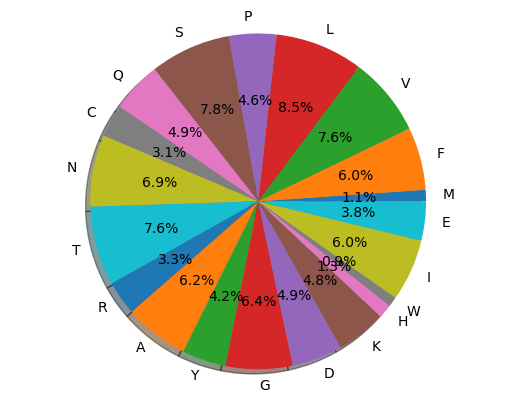

In [13]:
import matplotlib.pyplot as plt

def plot_pie_chart(s):
    letter_count = n_subseq(s, 1)
    labels = list(letter_count.keys())
    sizes = list(letter_count.values())

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.show()

plot_pie_chart(sequence)


In [ ]:
# Store in a Pandas dataframe the same information depicted by the pie chart of the previous exercise. The dataframe should have three columns: `letter`, `occurrences`, `percentual`.


In [18]:
def create_dataframe(s: str) -> pd.DataFrame:
    """
    Creates a Pandas dataframe from the occurrences of letters in s.
    
    Arguments:
    s -- the input string
    
    Returns:
    A Pandas dataframe with three columns: letter, occurrences and percentual.
    """
    letter_count = collections.Counter(s)
    data = {'letter': list(letter_count.keys()),
            'occurrences': list(letter_count.values())}
    df = pd.DataFrame.from_dict(data, orient='columns')
    df['percentual'] = df['occurrences'] / len(s) * 100
    df = df.sort_values('percentual', ascending=False)
    return df

def plot_pie_chart():
    letter_count = n_subseq(sequence, 1)
    labels = list(letter_count.keys())
    sizes = list(letter_count.values())

    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plt.title





import collections
import pandas as pd

def create_data_frame(sequence):
    letter_counts = collections.Counter(sequence)
    data = {'letter': list(letter_counts.keys()),
            'occurrences': list(letter_counts.values())}
    df = pd.DataFrame(data)
    df['percentual'] = df['occurrences'] / len(sequence) * 100
    df = df.sort_values('percentual', ascending=False)
    return df

df = create_data_frame(sequence)


In [ ]:
# ### Exercise 5 (max 2 points)
#
# Print the letters of SARS-CoV-2 that occur at least 5% of the times.

In [15]:
def frequent_letters(df, threshold=0.05):
    frequent_letters = df[df['percentual'] >= threshold * 100]['letter']
    return frequent_letters

frequent_letters = frequent_letters(df)
print(frequent_letters)


1     F
2     V
3     L
5     S
8     N
9     T
11    A
13    G
18    I
Name: letter, dtype: object


In [ ]:
# ### Exercise 6 (max 4 points)
#
# Take advantage of the [numpy random choice generator](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) to produce a list of 10000 `str` with length 1273 and composed by the same letters of SARS-CoV-2. Be sure the the process is reproducible (i.e., you are able to get the exactly the same results another time). The process should take less than 10s.

# +
# %time

In [47]:
import numpy as np

def generate_random_strings(sequence, n_strings=20000, random_seed=42):
    np.random.seed(random_seed)
    random_strings = np.random.choice(list(sequence), size=(n_strings, len(sequence)), replace=True)
    return ["".join(rs) for rs in random_strings]

random_strings = generate_random_strings("".join(frequent_letters))


In [ ]:
# ### Exercise 7 (max 4 points)
#
# Count how many strings among the ones produced during the previous exercise have at most the same number (276) of sub-sequences of 2 letters.

In [48]:
def count_sub_sequences(string):
    count = 0
    for i in range(len(string)-1):
        for j in range(i+1, len(string)):
            count += 1
    return count

def count_strings_with_max_sub_sequences(random_strings, max_sub_sequences=276):
    count = 0
    for rs in random_strings:
        if count_sub_sequences(rs) <= max_sub_sequences:
            count += 1
    return count



count = count_strings_with_max_sub_sequences(random_strings)
print("Number of strings with at most 276 sub-sequencesof 2 letters:", count)

Number of strings with at most 276 sub-sequencesof 2 letters: 20000


In [ ]:
# ### Exercise 8 (max 5 points)
#
# Do the comparison of the previous exercise for the sub-sequences of 2, 3, 4, 5, 6, 7, 8 letters. Print the percentage of cases in which you get a number of sub-sequences exactly equal to the one originally present in the SARS-CoV-2 string.
#
#
#

In [49]:
def count_sub_sequences(string, n):
    unique_sub_sequences = set()
    for i in range(len(string) - n + 1):
        unique_sub_sequences.add(string[i:i+n])
    return len(unique_sub_sequences)

def count_strings_with_exact_sub_sequences(random_strings, exact_sub_sequences, n):
    count = 0
    for rs in random_strings:
        if count_sub_sequences(rs, n) == exact_sub_sequences:
            count += 1
    return count


sars_cov_2_string = sequence
n_letters = [2, 3, 4, 5, 6, 7, 8]

original_sub_sequences = [count_sub_sequences(sars_cov_2_string, n) for n in n_letters]




for i, n in enumerate(n_letters):
    count = count_strings_with_exact_sub_sequences(random_strings, original_sub_sequences[i], n)
    percentage = count / len(random_strings) * 100
    print(f"Percentage of strings with exactly {original_sub_sequences[i]} sub-sequences of {n} letters: {percentage:.2f}%")


Percentage of strings with exactly 8 sub-sequences of 2 letters: 71.97%
Percentage of strings with exactly 7 sub-sequences of 3 letters: 97.34%
Percentage of strings with exactly 6 sub-sequences of 4 letters: 99.80%
Percentage of strings with exactly 5 sub-sequences of 5 letters: 99.98%
Percentage of strings with exactly 4 sub-sequences of 6 letters: 100.00%
Percentage of strings with exactly 3 sub-sequences of 7 letters: 100.00%
Percentage of strings with exactly 2 sub-sequences of 8 letters: 100.00%
